**Домашнее задание к лекции «Feature Selection»**

**Задание**\
**Цель:**\
Изучить методы отбора признаков для эффективного обучения моделей машинного обучения.\
**Описание задания:**\
В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

**1.Сгенерируйте данные с помощью кода:\
from sklearn.datasets import make_classification\
x_data_generated, y_data_generated = make_classification(scale=1)**

In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats 

import seaborn as sns 
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import make_classification

In [3]:
x_data_generated, y_data_generated = make_classification(scale = 1, random_state = 42)
X = x_data_generated
y = y_data_generated

In [4]:
X.shape

(100, 20)

In [5]:
y.shape

(100,)

In [6]:
data = np.column_stack((X, y))
data.shape

(100, 21)

**2.Постройте модель логистической регрессии и оцените среднюю точность. 
Для этого используйте следующий код: \
cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()**

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [8]:
score = round(cross_val_score(LogisticRegression(random_state = 42), 
                              X, y, scoring = 'accuracy').mean(),
              3)
score

0.98

**3.Используйте статистические методы для отбора признаков:\
a) Выберите признаки на основе матрицы корреляции.\
b) Отсеките низковариативные признаки (VarianceThreshold).\
c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.**

In [9]:
data_df = pd.DataFrame(data, columns = ['x1', 'x2', 'x3', 'x4', 'x5', 
                                        'x6', 'x7', 'x8', 'x9', 'x10',
                                        'x11', 'x12', 'x13', 'x14', 'x15', 
                                        'x16', 'x17', 'x18', 'x19', 'x20', 'y'])

[Text(0.5, 1.0, 'Корреляционная матрица')]

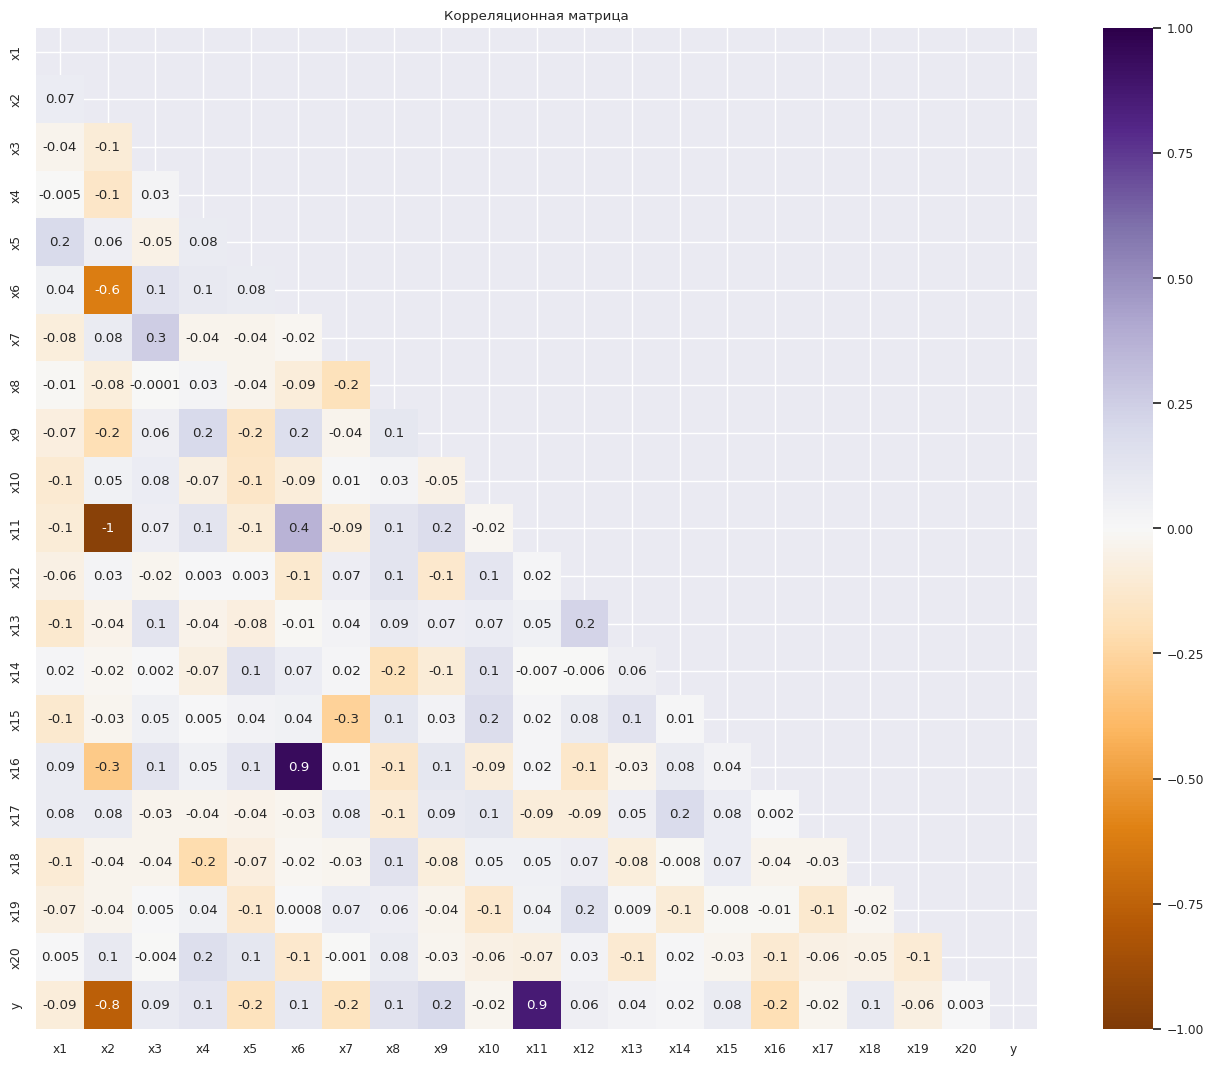

In [10]:
sns.set(rc={'figure.figsize':(17, 13)}, font_scale = 0.8)

matrix = np.triu(data_df.corr())

corr = data_df.corr()
sns.heatmap(corr,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True, fmt ='.1g',
            vmin = -1, vmax = 1, center = 0,
            mask = matrix,
            cmap= 'PuOr', square=True).set(title = 'Корреляционная матрица')

Удалим один из колллинеарных признаков, и те, что очень слабо коррелируют с целевой переменной.

In [11]:
data_df = data_df.loc[:, (data_df.columns != 'x2') &
               (data_df.columns != 'x16') & 
               (data_df.columns != 'x20')]
data_df.shape

(100, 18)

In [12]:
x_corr = data_df.shape[1] - 1
x_corr

17

Посчитаем метрику

In [13]:
X = data_df.drop(columns = 'y')
y = data_df['y']

In [14]:
X.shape

(100, 17)

In [15]:
score_corr = round(cross_val_score(LogisticRegression(random_state = 42), 
                                    X, y, scoring = 'accuracy').mean(),
                   3)
score_corr

0.95

Уберем низковариативные признаки

In [16]:
from sklearn.feature_selection import VarianceThreshold

In [17]:
var = VarianceThreshold(threshold = 1)
X_selected = var.fit_transform(X)
X_selected.shape

(100, 8)

In [18]:
x_VT = X_selected.shape[1]
x_VT

8

In [19]:
score_VT = round(cross_val_score(LogisticRegression(random_state = 42), 
                           X_selected, y, scoring = 'accuracy').mean(),
                 3)
score_VT

0.97

**4.Осуществите отбор признаков на основе дисперсионного анализа:\
a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).\
b) Повторите п. 2 на отобранных признаках.**

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [21]:
X = x_data_generated
y = y_data_generated

X_selected = SelectKBest(f_classif, k = 5).fit_transform(X, y)
score = cross_val_score(LogisticRegression(random_state = 42), X_selected,
                            y, scoring='accuracy').mean()

In [22]:
x_VA = X_selected.shape[1]
x_VA

5

In [23]:
score_VA = round(cross_val_score(LogisticRegression(random_state = 42), 
                                 X_selected, y, scoring='accuracy').mean(),
                 3)
score_VA

0.98

**5.Отбор с использованием моделей:\
a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.\
b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.\
c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.**

In [24]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [25]:
X_sc = StandardScaler().fit_transform(X)

In [26]:
svc = LinearSVC(C = 0.1, penalty = 'l1', dual = False).fit(X_sc, y)
model = SelectFromModel(svc, prefit = True)
X_selected = model.transform(X_sc)

X_selected.shape

(100, 6)

In [27]:
x_L1 = X_selected.shape[1]
x_L1

6

In [28]:
score_L1 = round(cross_val_score(LogisticRegression(random_state = 42), 
                                 X_selected, y, scoring='accuracy').mean(),
                 3)
score_L1

0.99

In [29]:
RF_model = RandomForestClassifier(random_state = 42, n_jobs = -1)

params = {'max_depth':[2, 3, 5, 10, 20, 30],
         'min_samples_leaf':[5, 10, 20],
         'n_estimators':[20], 
         'max_features': [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]}

grid_search = GridSearchCV(estimator = RF_model, param_grid = params, verbose = 1, 
                           n_jobs =-1, scoring = 'recall')
grid_search.fit(X, y)

RF_model_best = grid_search.best_estimator_

Fitting 5 folds for each of 126 candidates, totalling 630 fits


In [30]:
data = np.column_stack((X, y))
data.shape

(100, 21)

In [31]:
data_df = pd.DataFrame(data, columns = ['x1', 'x2', 'x3', 'x4', 'x5', 
                                        'x6', 'x7', 'x8', 'x9', 'x10',
                                        'x11', 'x12', 'x13', 'x14', 'x15', 
                                        'x16', 'x17', 'x18', 'x19', 'x20', 'y'])

In [32]:
feature_importance = pd.DataFrame({'Feature':data_df.drop(columns = 'y').columns, 
                                   'Importance':RF_model_best.feature_importances_})
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = False)
feature_importance = feature_importance.set_index('Feature')

In [33]:
feature_importance

,Importance
Feature,
x11,0.384574
x2,0.195951
x5,0.062218
x17,0.062189
x8,0.048244
x13,0.034964
x16,0.033604
x4,0.033256
x20,0.029561


[Text(0.5, 1.0, 'Важность признаков')]

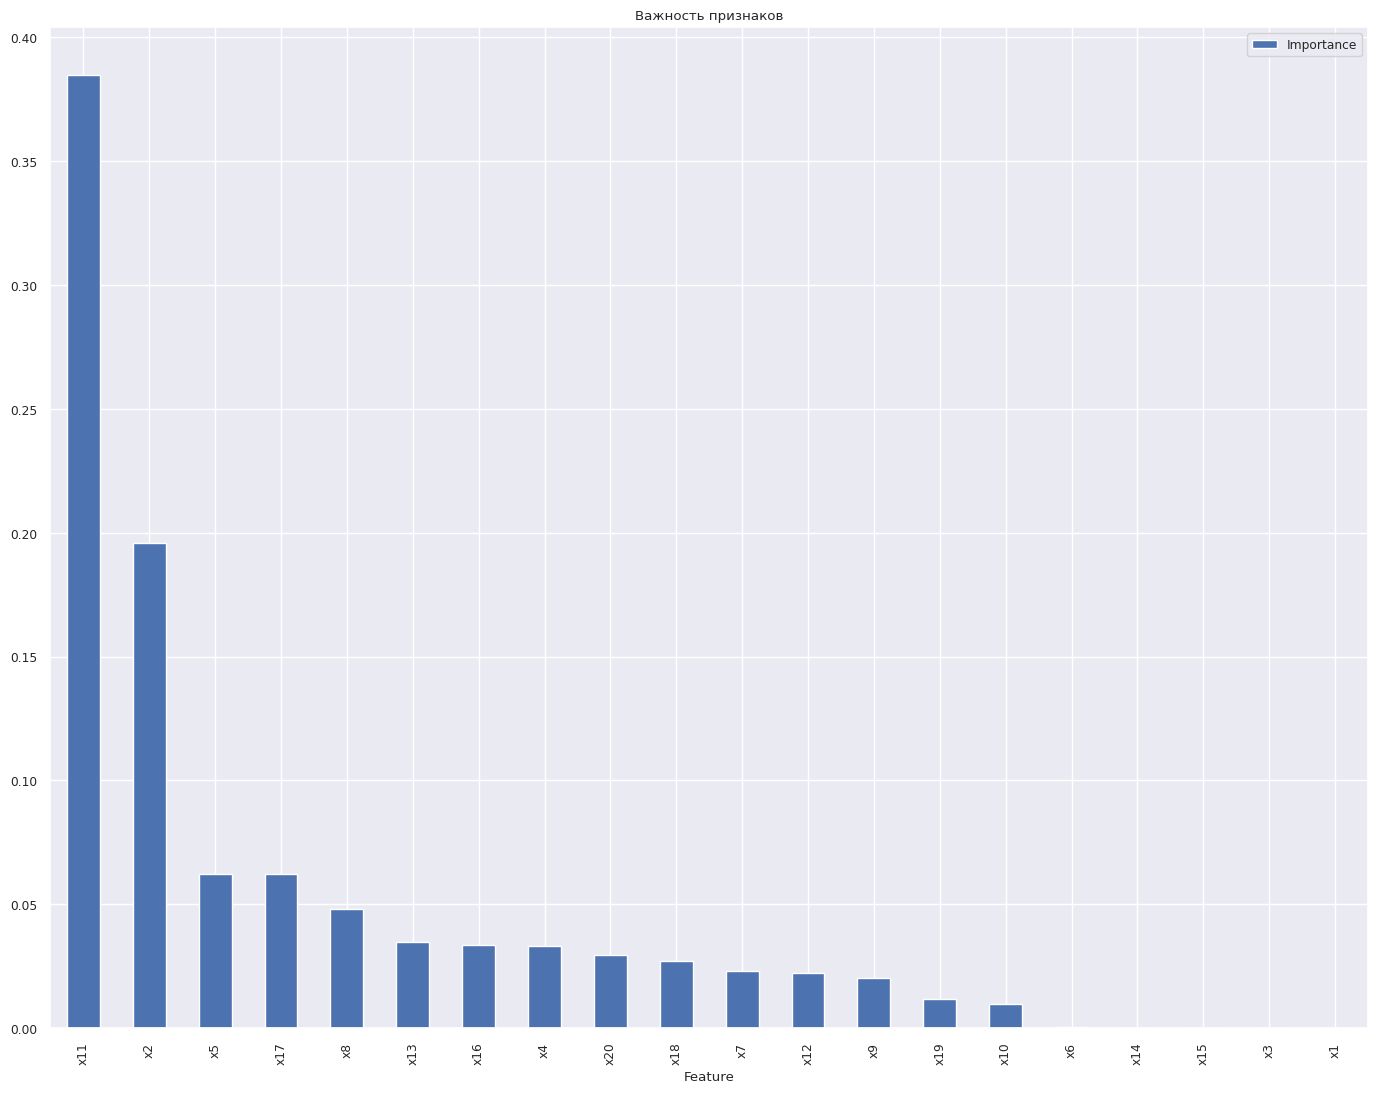

In [34]:
feature_importance.plot(kind='bar').set(title = 'Важность признаков')

Оставим 3 самых важных по данным модели

In [35]:
X_selected = data_df[[feature_importance.iloc[0].name,
                      feature_importance.iloc[1].name, 
                      feature_importance.iloc[2].name]]
X_selected

,x11,x2,x5
0,-0.071335,0.029102,0.504987
1,-1.158068,0.659924,0.597400
2,-0.270624,0.950573,-0.623141
3,0.852392,-0.320670,1.317394
4,-0.348985,-0.222100,-0.982487
...,...,...,...
95,-1.217220,1.431401,1.179297
96,1.039670,-0.545612,-1.001620
97,1.985223,-1.604993,0.096121
98,-1.648321,1.203166,0.010353


In [36]:
x_RF = X_selected.shape[1]
x_RF

3

In [37]:
score_RF = round(cross_val_score(LogisticRegression(random_state = 42), 
                                 X_selected, y, scoring='accuracy').mean(),
                 3)

score_RF

0.95

**6.Перебор признаков:\
a) SequentialFeatureSelector.\
b) Повторите п. 2 на отобранных признаках.**

In [38]:
from sklearn.feature_selection import SequentialFeatureSelector

In [39]:
X = x_data_generated

In [40]:
model = LogisticRegression(random_state = 42)

sfs = SequentialFeatureSelector(model, n_features_to_select = 6)

sfs.fit(X, y)

sfs.get_support()

array([ True,  True, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False])

In [41]:
feature_names = np.array(data_df.drop(columns = 'y').columns)

names = feature_names[sfs.get_support()]

print(names)

['x1' 'x2' 'x4' 'x6' 'x7' 'x11']


In [42]:
X_selected = data_df[[names[0], names[1], names[2], names[3], names[4], names[5]]]

In [43]:
x_SFS = X_selected.shape[1]
x_SFS

6

In [44]:
score_SFS = round(cross_val_score(LogisticRegression(random_state = 42), 
                                 X_selected, y, scoring='accuracy').mean(),
                 3)

score_SFS

1.0

**7.Сформулируйте выводы по проделанной работе:\
a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.**

In [45]:
data = {'FS_type': ['Без отбора', 'Корреляционная матрица', 'VarianceThreshold',
                  'Дисперсионный анализ', 'L1 регуляризация', 'RF feature importance',
                  'SequentialFeatureSelector'],
        'features_selected': [20, x_corr, x_VT, x_VA, x_L1, x_RF, x_SFS],
        'avg_score': [score, score_corr, score_VT, score_VA, score_L1, score_RF, score_SFS]} 
 
df_compare = pd.DataFrame(data)

df_compare

,FS_type,features_selected,avg_score
0,Без отбора,20,0.98
1,Корреляционная матрица,17,0.95
2,VarianceThreshold,8,0.97
3,Дисперсионный анализ,5,0.98
4,L1 регуляризация,6,0.99
5,RF feature importance,3,0.95
6,SequentialFeatureSelector,6,1.00


При правильном способе отбора признаков, можно улучшить метрику качества и заметно сократить количество признаков, что уменьшит затраты.